# CLUSTERING COUNTRIES 

The following dataset has been provided by the 'HELP Orgainization'(an international humanitarian NGO) which contains all the <b>Socio-Economic</b> and <b>Health Standards</b> information of all the countries in the world. 
<br><br>
'Country-data.csv' has features like country , exports , imports , health , gdpp, life expectancy and many more.
<br>'data-dictionary.csv' files contains the description of the dataset.

#### MAIN OBJECTIVE : Our primary goal is to develop a model that helps in clustering of countries so as to easily classify countries with respect to their development and which countries need help.

The overview of the steps to perform: 
<br> 1) Data Visualization
<br> 2) Data Cleaning A) Eliminate NA/Null Data Records B) Feature Engineering .
<br> 3) Tranforming and Scaling of Data
<br> 4) Run Unsupervised Models
<br> 5) Optimize the best model
<br> 6) Predict Results and Best Model
<br> 7) Conclusions
<br>

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import os , seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
# sns.set_palette(palette)

#  WARNINGS
import warnings
warnings.filterwarnings("ignore" , category=RuntimeWarning)
warnings.filterwarnings("ignore" , category=UserWarning)


## DATA

In [143]:
# Description
desc_path = 'data-dictionary.csv'
desc = pd.read_csv(desc_path)

#  Dataset
filepath = 'Country-data.csv'
data = pd.read_csv(filepath)

<br><br><br><br><br><br><br><br><br><br>

In [3]:
desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [22]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
data.shape

(167, 10)

The dataset has 10 features and 167 data records(countries).

<br><br><br><br><br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
print('No. of Float Data types   : ' ,(data.dtypes == 'float64').sum())
print('No. of Object Data types  : ' ,(data.dtypes == 'object').sum())
print('No. of Integer Data types : ' ,(data.dtypes == 'int64').sum())

No. of Float Data types   :  7
No. of Object Data types  :  1
No. of Integer Data types :  2


<br>

In [8]:
# DATA INFO and DISTRIBUTION

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Since the avg mean of the features have very large difference thus we need to scale the data. Also, features like 'child_mort', 'imports' , 'exports' , 'income' , 'gdpp' and 'inflation' have a significant rise in value after 75% percentile and max that signifies that these are right skewed. We need to transform these features first.
<br> 'country' is a Categorical Feature and needs to be encoded.

### CHECK NULL VALUE

In [9]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There's no Null values in the dataset. So we can move forward to Data Visualization.

## DATA VISUALIZATION

In [144]:
# colors = ['#DB1C18','#DBDB3B','#51A2DB']
# sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
country = data.country
numerical_cols = data.select_dtypes(exclude='object').columns
data2 = data[numerical_cols]
data2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


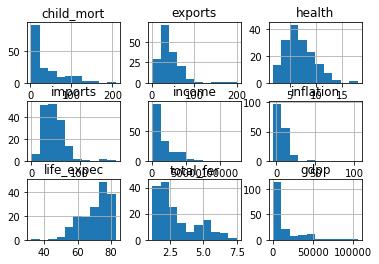

In [12]:
# DATA DISTRIBUTION - HISTOGRAM 
data2.hist()
plt.show()

As infered earlier features like 'child_mort', 'imports' , 'exports' , 'income' , 'gdpp' and 'inflation' heavily right skewed and need to be transformed.

In [13]:
# SCATTER PLOT 

# sns.pairplot(data, corner =True  )
# plt.show()

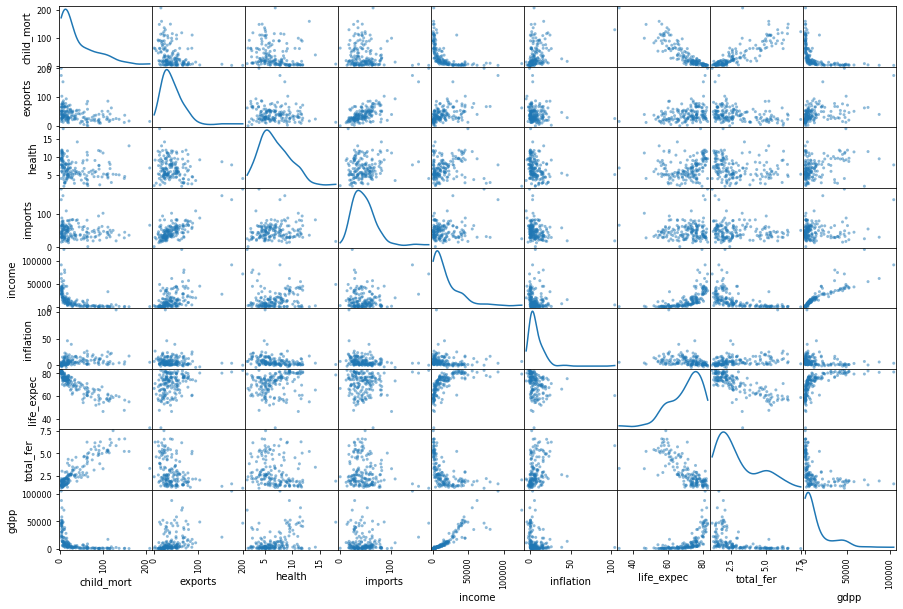

In [14]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data ,diagonal='kde' ,figsize=(15,10) )
plt.show()

In [15]:
#  BOXPLOT
# fig = plt.figure()
# fig.suptitle('Classifier Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(data2)
# # ax.set_xticklabels(country)
# plt.show()

From the graph it is visible there are two cluster formation. 
<br>Some observation : 
1) Child_mort, total_fer have negative correlation with gdpp. <br>
2) Income has positive correlation with gdpp.<br>
3) Child_mort and total_fer have a clear positive correlation.<br>


<AxesSubplot:>

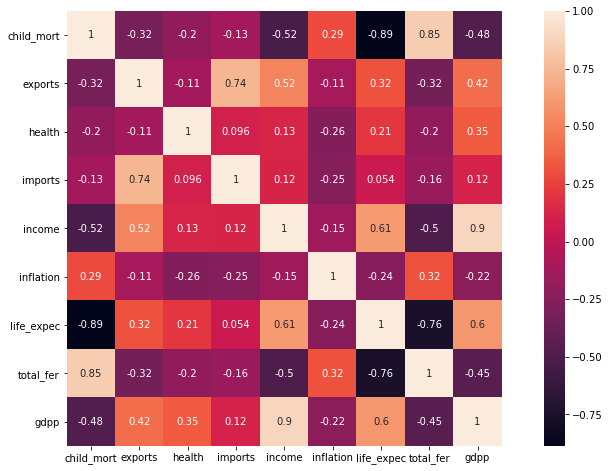

In [16]:
# HEATMAP
fig=plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, square=True )

## DATA TRANSFORM

In [145]:

# Transform features
for col in data2.columns:
    data2[col] = np.log(data2[[col]])
    
# MinMaxScaler
from sklearn.preprocessing import StandardScaler 
# mm = StandardScaler()
# for col in data2.columns:
#     data2[col] = mm.fit_transform(data2[[col]])
df_scaled = StandardScaler().fit_transform(data.drop(['country'], axis=1))

<ipython-input-145-07b3fee602ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = np.log(data2[[col]])


In [146]:
pd.DataFrame(df_scaled , columns=numerical_cols)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## DATA MODELING

Using PCA dimensional analysis lets see the cluster formation.

In [147]:
#  PCA 

from sklearn.decomposition import PCA
# pca_list

PCA_model = PCA(svd_solver='auto')
PCA_model.fit(df_scaled)


PCA()

In [148]:
#  EXPALINED VARIANCE RATIO OF AXIS
exp_variance = np.cumsum(np.round(PCA_model.explained_variance_ratio_ , 2))
print('\nThe EXPALINED VARIANC RATIO OF AXIS : \n',exp_variance)


The EXPALINED VARIANC RATIO OF AXIS : 
 [0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


<br><br><br><br><br><br><br><br>

Text(0, 0.5, 'Explained Variance Ratio')

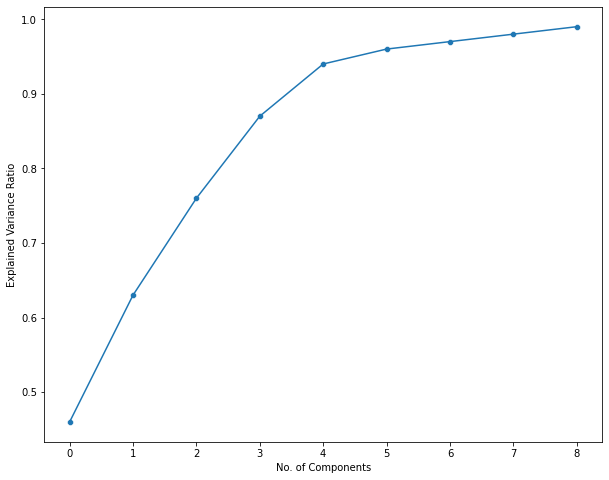

In [72]:
# PLOT 

fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(y=exp_variance , x=np.arange(0, len(exp_variance)))
ax = sns.scatterplot(y=exp_variance , x=np.arange(0, len(exp_variance)))
ax.set_xlabel('No. of Components')
ax.set_ylabel('Explained Variance Ratio')

So, from the graph it is pretty evident that the Explained Variance deviation is not much between 3 to 5 and negligible after 5. Thus, we would be considering clusters of 3,4 and 5 in our model and check for the best results.

<br><br><br><br>
## 1) HIERARCHIAL CLUSTER

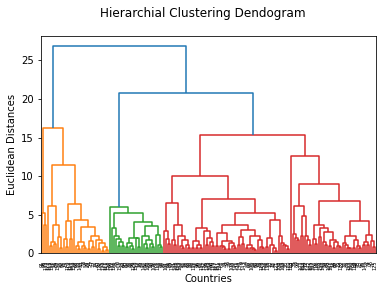

In [73]:
from scipy.cluster import hierarchy
Z= hierarchy.linkage(df_scaled , method='ward')
dendogram = hierarchy.dendrogram(Z)
plt.suptitle('Hierarchial Clustering Dendogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

For Hierarchial Clustering we can clearly see 3 distant cluster.

## 2) K MEANS

Running K Means in a loop for different K values from 1 to 10

In [77]:
from sklearn.cluster import KMeans
# Store the Inertia and model object for each K
km_list = list()

for k in range(1,10):
    km = KMeans(n_clusters= k , random_state=7)
    km.fit(df_scaled)
    
    km_list.append(pd.Series({
        'clusters' : k,
        'inertia' : km.inertia_,
        'model' : km
    }))
    


In [79]:
pd.DataFrame(km_list)

,clusters,inertia,model
0,1,1503.000000,"KMeans(n_clusters=1, random_state=7)"
1,2,1050.214558,"KMeans(n_clusters=2, random_state=7)"
2,3,831.424435,"KMeans(n_clusters=3, random_state=7)"
3,4,700.322999,"KMeans(n_clusters=4, random_state=7)"
4,5,619.937115,"KMeans(n_clusters=5, random_state=7)"
5,6,550.712602,"KMeans(n_clusters=6, random_state=7)"
6,7,497.745863,"KMeans(n_clusters=7, random_state=7)"
7,8,468.982215,KMeans(random_state=7)
8,9,431.711094,"KMeans(n_clusters=9, random_state=7)"


<br><br><br><br>
### PLOT Distortion Elbow Curve

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'Inertia')]

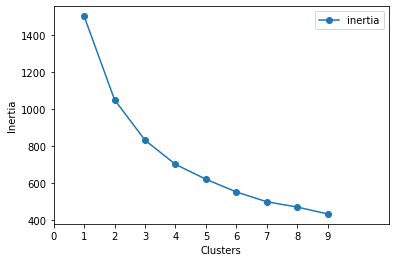

In [92]:
# Plot Inertia vs No.of Clusters

plot_data = (pd.concat(km_list, axis=1)
             .T[['clusters' , 'inertia']]
             .set_index('clusters') )

ax = plot_data.plot(marker = 'o' , ls='-')
ax.set_xticks(range(0 , 10 , 1))
ax.set_xlim(0 ,11)
ax.set(xlabel = 'Clusters' , ylabel='Inertia' ) 

Even the <b>Elbow Method</b> for the KMeans clearly <b>supports K=3</b> as a good choice for the our KMeans model for classification of models with relatively good distortion score(700.33). 

## KMeans K=3

In [149]:
#  Final Model

model = KMeans(n_clusters=3 , random_state=1)
model.fit(df_scaled)

#  Store the Cluster Index into the DataFrame
data['KMeans_cluster'] = model.labels_


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Clustering of our Countries

<AxesSubplot:xlabel='child_mort', ylabel='health'>

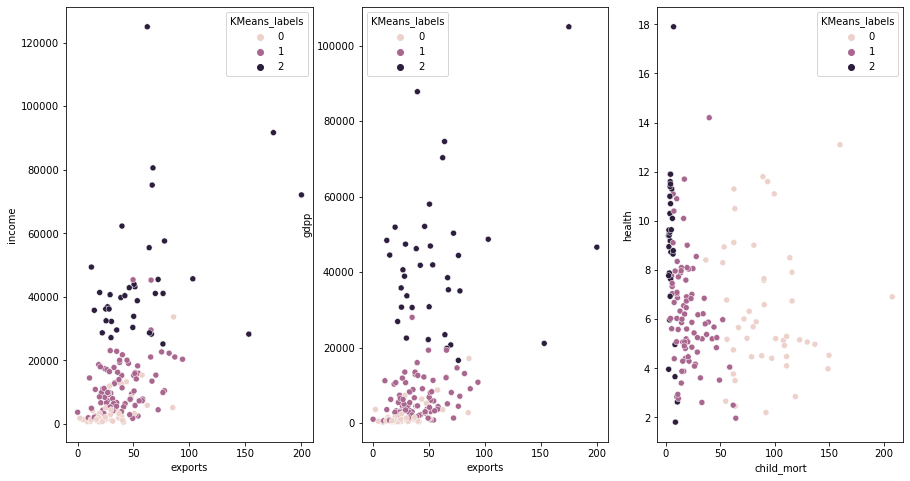

In [120]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,8))
sns.scatterplot(data=data, x='exports', y='income',hue='KMeans_cluster', ax=ax[0])
sns.scatterplot(data=data, x='exports', y='gdpp',hue='KMeans_cluster', ax=ax[1])
sns.scatterplot(data=data, x='child_mort', y='health', hue='KMeans_cluster', ax=ax[2])

### Analyze the Clusters

Need to decide the labels for the cluster well suitung the clusters so any country can easily be understood as developed or not or needs help or not.

In [127]:
data.groupby('KMeans_cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMeans_labels,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444


<br><br><br><br><br><br><br>

In [134]:
data.groupby(['KMeans_cluster' , 'country']).mean()

child_mort  exports  health  imports  \
KMeans_labels country                                                      
0             Afghanistan                 90.2     10.0    7.58     44.9   
              Angola                     119.0     62.3    2.85     42.9   
              Benin                      111.0     23.8    4.10     37.2   
              Botswana                    52.5     43.6    8.30     51.3   
              Burkina Faso               116.0     19.2    6.74     29.6   
...                                        ...      ...     ...      ...   
2             Sweden                       3.0     46.2    9.63     40.7   
              Switzerland                  4.5     64.0   11.50     53.3   
              United Arab Emirates         8.6     77.7    3.66     63.6   
              United Kingdom               5.2     28.2    9.64     30.8   
              United States                7.3     12.4   17.90     15.8   

                                    income  inflation  life_expec  total_fer  \
KMeans_labels country                                                          
0             Afghanistan             1610      9.440        56.2       5.82   
              Angola                  5900     22.400        60.1       6.16   
              Benin                   1820      0.885        61.8       5.36   
              Botswana               13300      8.920        57.1       2.88   
              Burkina Faso            1430      6.810        57.9       5.87   
...                                    ...        ...         ...        ...   
2             Sweden                 42900      0.991        81.5       1.98   
              Switzerland            55500      0.317        82.2       1.52   
              United Arab Emirates   57600     12.500        76.5       1.87   
              United Kingdom         36200      1.570        80.3       1.92   
              United States          49400      1.220        78.7       1.93   

                                     gdpp  
KMeans_labels country                      
0             Afghanistan             553  
              Angola                 3530  
              Benin                   758  
              Botswana               6350  
              Burkina Faso            575  
...                                   ...  
2             Sweden                52100  
              Switzerland           74600  
              United Arab Emirates  35000  
              United Kingdom        38900  
              United States         48400  

[167 rows x 9 columns]

After analyzing the above tables I have decided the labels for each cluster in our dataset as:<br>
0 : Need Help / Underdeveloped <br>
1 : Might Need Help / Developing<br>
2 : Donot Need Help / Developed<br>

In [150]:
label = {0 : 'Need Help',
         1 : 'Might Need Help',
         2 : 'Donot Need Help' 
        }

data['KMeans_labels'] = data['KMeans_cluster'].map(label)

# Number of Countries in each Cluster
data['KMeans_labels'].value_counts()

Might Need Help    84
Need Help          47
Donot Need Help    36
Name: KMeans_labels, dtype: int64

There are 47 countries that need help , 84 countires that might need help and 36 countries that doesnit need help.

In [136]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,labels=model.labels_)

0.28329575683463126

<br><br><br>
## PREDICTIONS

The data has been successfully classified into 3 groups: <b>'Need Help'</b> , <b>'Might Need Help'</b> and <b>'Donot Need Help'</b>.
<br><br>
Example listing all the countries need help:    

In [138]:
data[data['KMeans_labels'] == 'Need Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

<br><br><br><br><br><br><br><br>
## CONCLUSION

I have successfully classified all the countries into <b>'Need Help'</b> , <b>'Might Need Help'</b> and <b>'Donot Need Help'</b>.
<br>
1. Most of the American and European Countries may not need help.<br>
2. Most of the African countries and Middle Eastern countries like Iraq, Yemen , Afghanisthan , Pakisthan requires help.
<br>
3. Most of the remaining Asian Countries Might require help, lying in between the two classes.

Thus, this completes my analysis with a KMeans Model of K=3 having distortion score(700.33) for classifying our Country.csv dataset.


### IMPROVEMENTS : 
Here I haven't considered other Unsupervised Models like Mean Shift and DBSCAN. Also only have been considered PCA for Dimensional Reduction could have improved by Kernel PCA or MDS.
Also, for data transformation haven't tried other methods like boxcox for normalizing the skewed features.